# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

df = pd.read_csv(
    'https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz',
    sep='\t')
df.sample(10)

   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
3029,7.1,0.47,0.29,14.8,0.024,22.0,142.0,0.99518,3.12,0.48,12.0,8
3330,6.7,0.23,0.33,8.1,0.048,45.0,176.0,0.99472,3.11,0.52,10.1,6
4350,7.0,0.36,0.25,5.7,0.015,14.0,73.0,0.98963,2.82,0.59,13.2,6
1619,6.2,0.22,0.49,6.0,0.029,31.0,128.0,0.99280,3.41,0.36,11.3,8
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.99260,3.37,0.47,10.4,6
731,6.2,0.25,0.48,10.0,0.044,78.0,240.0,0.99655,3.25,0.47,9.5,6
1356,7.3,0.22,0.41,15.4,0.050,55.0,191.0,1.00000,3.32,0.59,8.9,6
555,9.2,0.25,0.34,1.2,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
1559,8.8,0.35,0.49,1.0,0.036,14.0,56.0,0.99200,2.96,0.33,10.5,4
3574,8.1,0.17,0.21,1.6,0.036,24.0,119.0,0.99396,3.18,0.52,10.1,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE

df.describe()
#All columns are continous variable/number values. Making this suitable for multiple least squares regression
#Fixed Acidity: 
   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

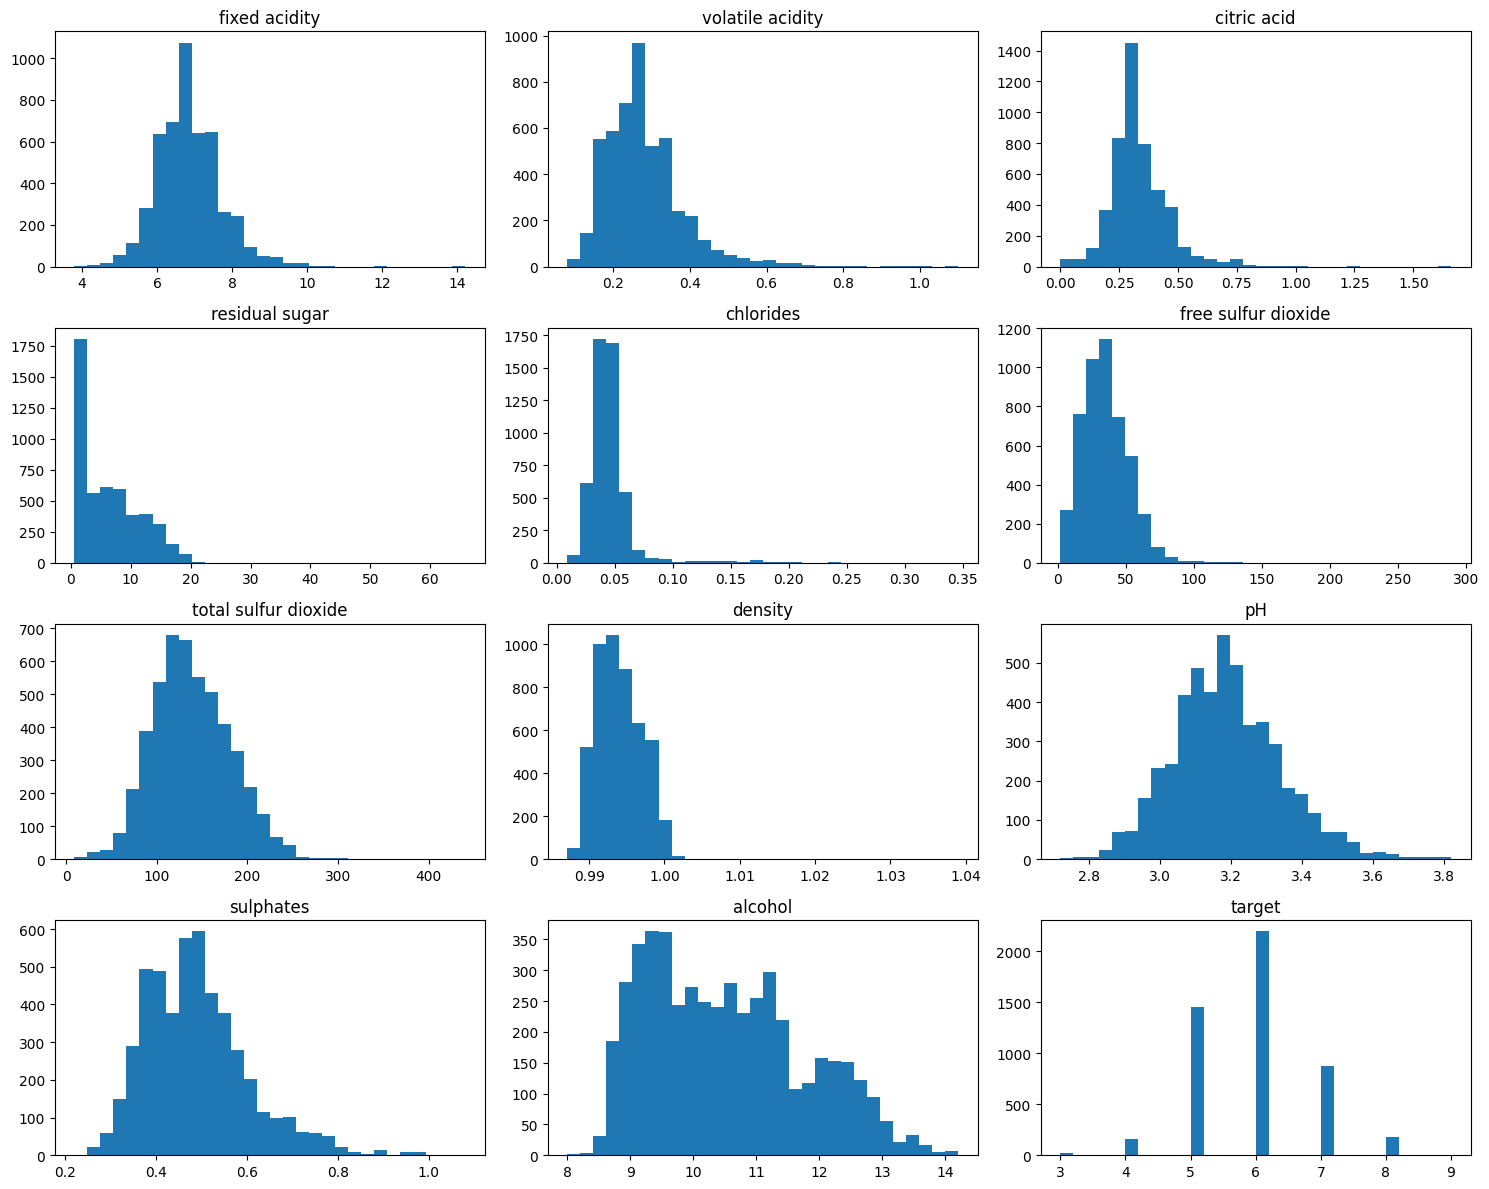

fixed acidity 0.6477514746297539
volatile acidity 1.5769795029952025
citric acid 1.2819203981671066
residual sugar 1.0770937564240868
chlorides 5.023330682759706
free sulfur dioxide 1.4067449205303078
total sulfur dioxide 0.3907098416536745
density 0.9777730048689898
pH 0.4577825459180807
sulphates 0.9771936833065663
alcohol 0.4873419932161276
target 0.15579639772222578


In [5]:
# YOUR CODE HERE


columns = df.columns #create a variable isolating columns

plt.figure(figsize=(15, 12)) #define area of entire plot (not just histogram subplot sizes)

for i, col in enumerate(columns, 1): #i = subplot indexes, col = column name (a string), enumerate(columns, 1) = returns pairs: 1, first column name : 2, second column name
    plt.subplot(4, 3, i)#divide entire plt.figure area into 4 rows and 3 columns (this means 12 graphs max, remember i in for loop is the created subplot variable)
    plt.hist(df[col], bins=30)#creates data from column feature and creates histogram with 30 vertical bars
    plt.title(col)#title of subplot is column name/feature

plt.tight_layout()
plt.show()

#note: skew is calculated skew = mean expected value(X - mean)**3 / standard deviation**3. 
for i, col in enumerate(columns, 1): #i = location/skew indexs, col = column name (a string), enumerate(columns, 1) = returns pairs: 1, first column name : 2, second column name
    print(col, df[col].skew()) #col = column name, df[col].skew = the skew output per column name

#note, the below graphs are majority right skewed indicating there are higher value outliers skewing the data. This would pull the mean to a higher value - higher than the median. The mean is very sensative to heavily right skewed graphs.

#Extreme Right Skewed Graph (skew greater than 2): Chlorides (this indicates nearly all the wine is low in Chloride with a few high count outliers). Resembles an exponential / Pareto-like heavy-tailed distribution
#Heavy Right Skewed Graphs (skew greater than 1): Volitile Acidity, Citrix Acid, Residual Sugar, Free Sulfer Dioxide. Resembles log-normal distribution
#Moderate Right Skewed Graphs (skew .5 to .99): Fixed Acidity, Density, Sulphates. Likely log-normal, however, closer to normally distributed data.
#Approximately or close to symetrical/normally distributed data: (skew 0.2 to .49): Total Sulfer Dioxide, PH (although visually this looks right skewed), Alcohol (visually this does not look like a great bell curve with the peak to the left of the majority of the data). Mild or minimal skew/approximately normal distributed data.
#Target (most syemtrical in shape and calculated skewness at .15): this looks like normally distributed data visualy with a strong bell curve-like shape. 



YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

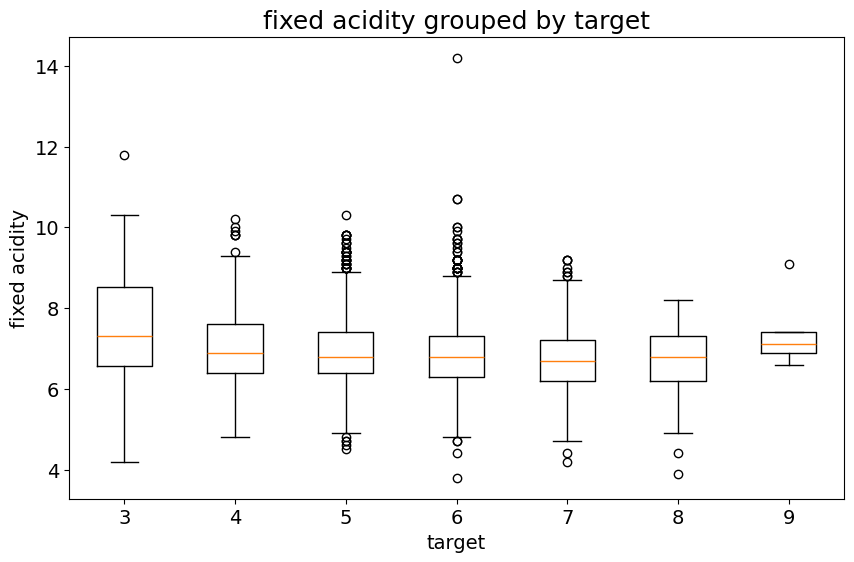

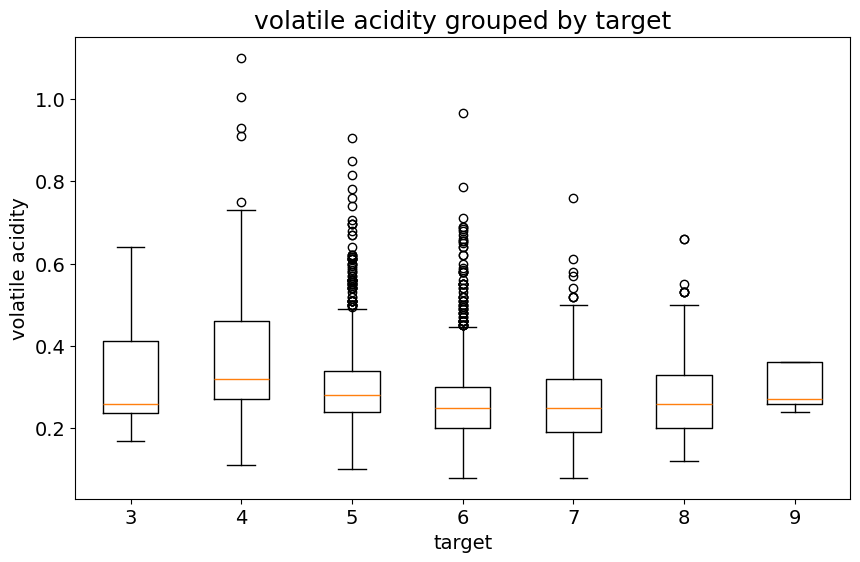

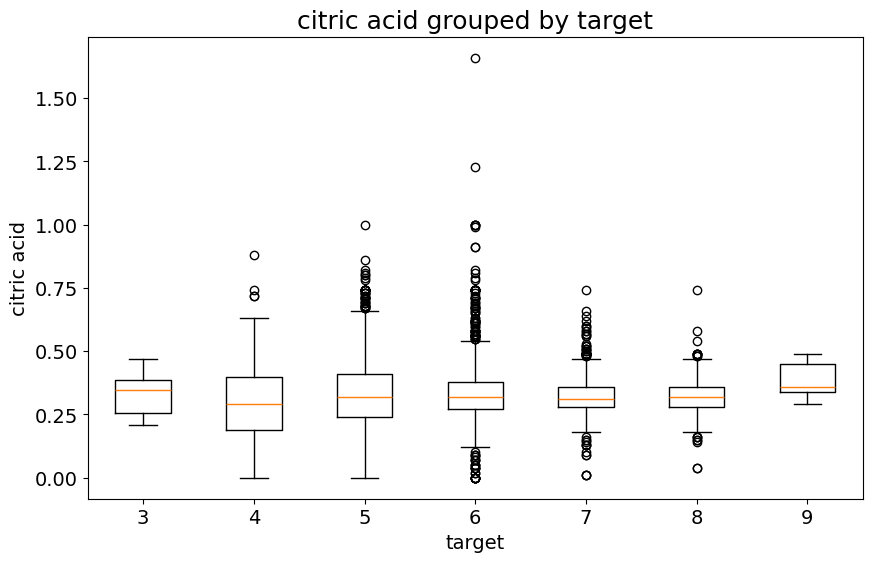

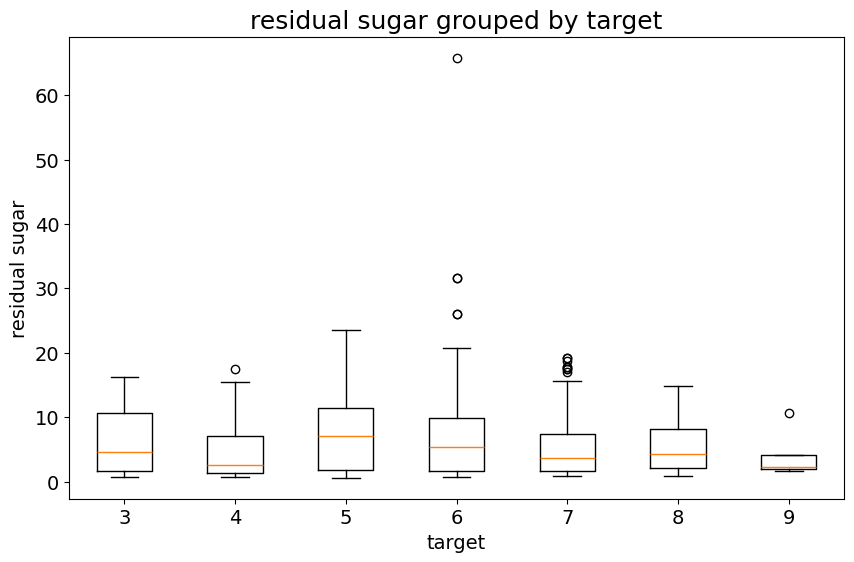

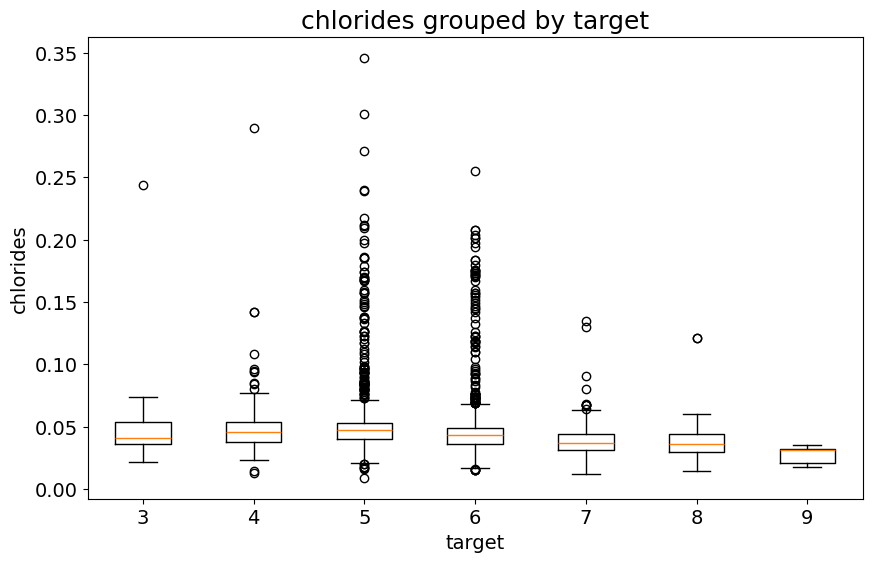

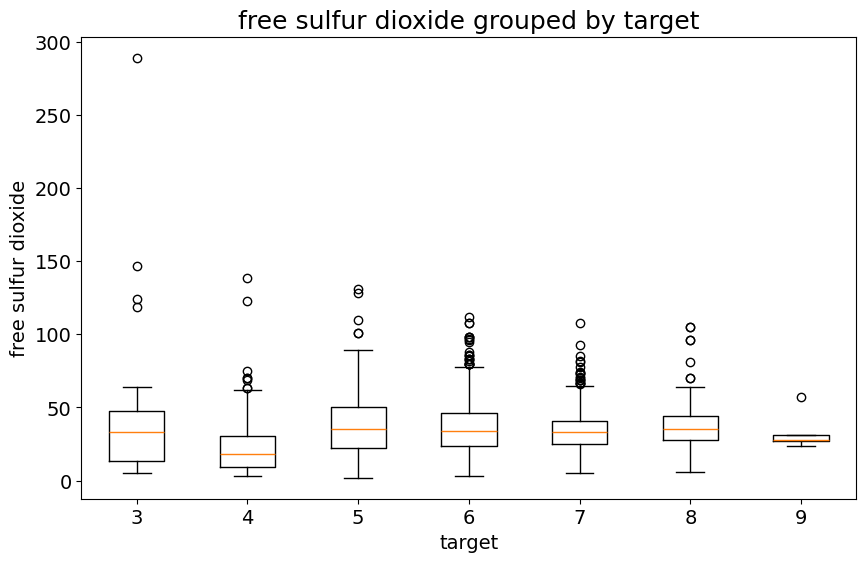

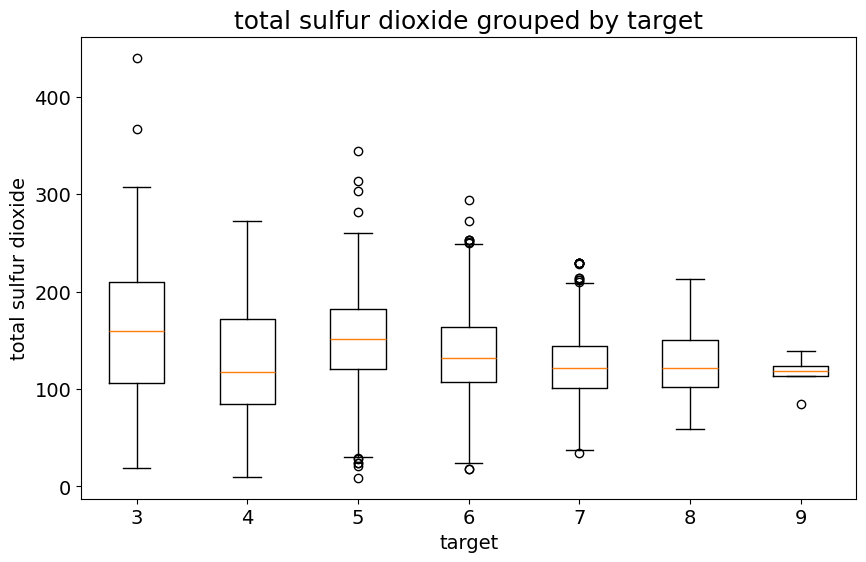

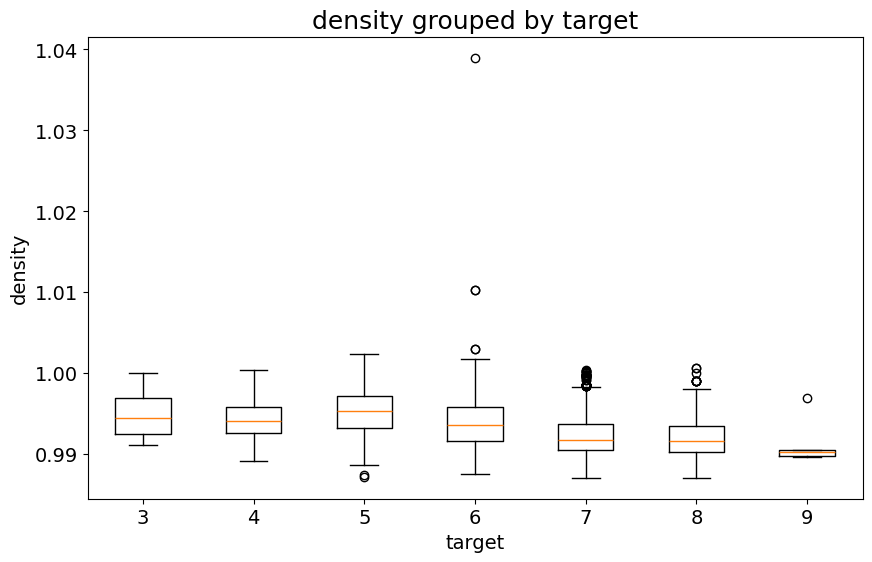

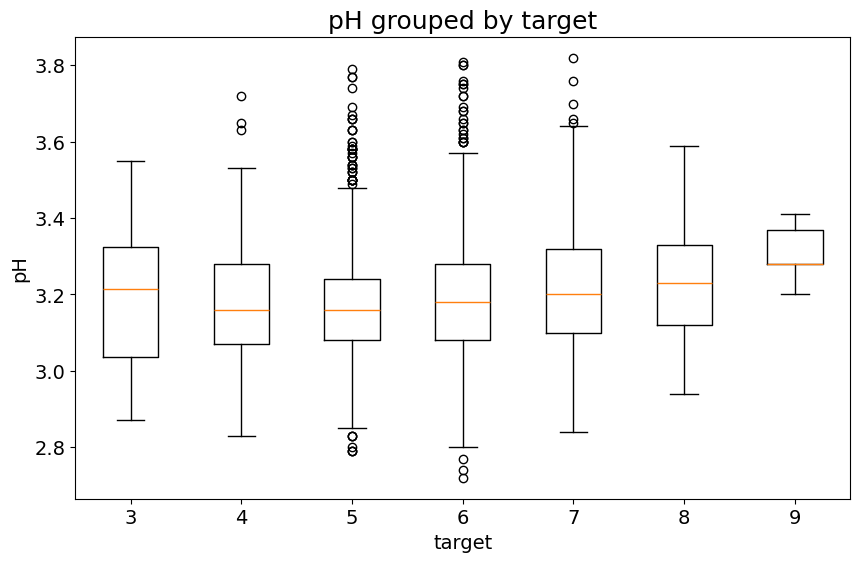

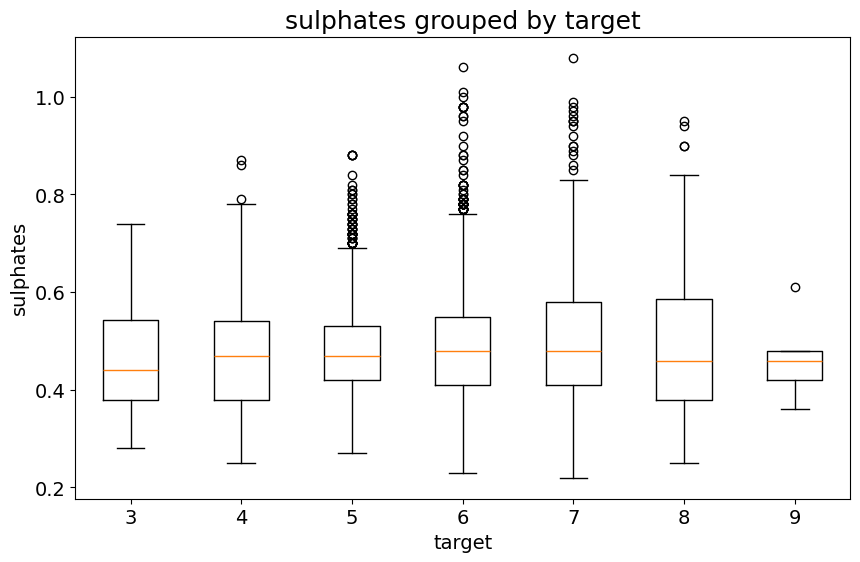

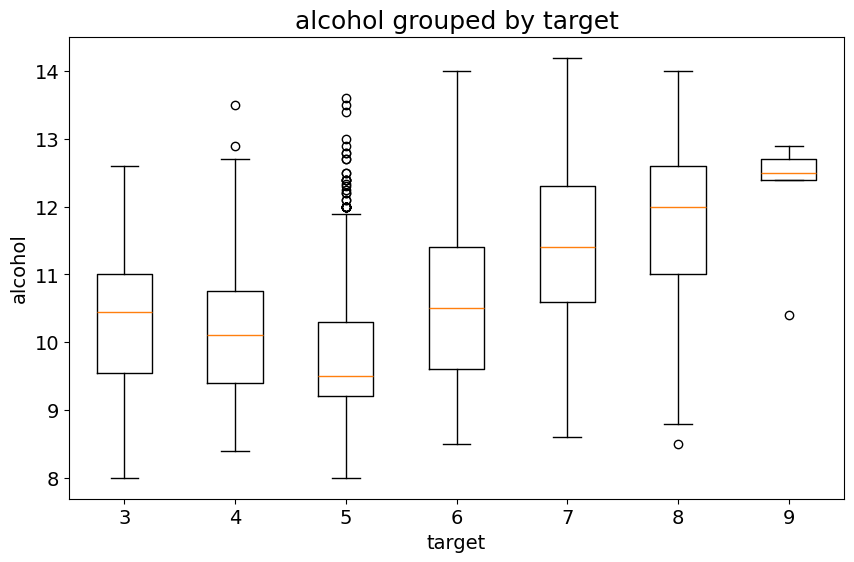

In [6]:
# YOUR CODE HERE
columns = df.columns.drop("target")

for col in columns:
    plt.figure(figsize=(10,6))
    data = [df[df['target'] == t][col] for t in sorted(df['target'].unique())]
    plt.boxplot(data, tick_labels=sorted(df['target'].unique()))
    plt.title(f"{col} grouped by target", fontsize=18)
    plt.xlabel("target", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

#Dependant variables to target: 
#         positive relationship and increasing medians/box plots as wine rating increases: Alcohol, PH
              #Alochol has the strongest relationship here, and, intuitively wines are being rated higher with higher alcohol content. Suggesting maybe the higher alcohol content is driving higher wine ratings (go figure).
#         negative relationship and decreasing medians/box plots as wine rating increases: Density, total Sulfer Dioxide
#Independant variabels to target
# Fixed Acidity, Volitile Acidity, Citric Acid, Residual Sugar, Cholorides, Free Sulfer Dioxide, Sulphates. With these - the box plots mostly overlap each other (and realtively even box sizes) on the same Y value range as well as the medians. 

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.5631540629886564


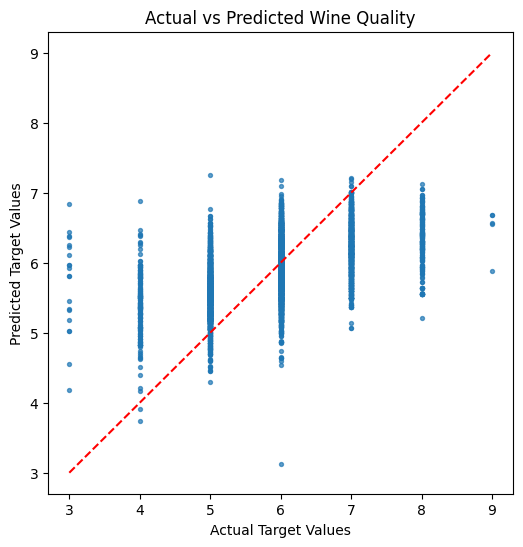

In [7]:
# YOUR CODE HERE

#separate x and y
X = df.drop(columns=["target"])
y = df["target"]

#Linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

#Predict on same dataset
y_pred = model.predict(X)

#mean squared error
mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error:", mse)

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, s=8, alpha=0.7)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--") 
plt.show()

#The mean squared error of 0.563 suggests that the linear model does capture some underlying trend in the data (since its only off by roughly half a prediction value, with the prediction values ranging 3 to 9).
#However, the predictions remain noisy. This aligns with the actual vs. predicted scatter plot, which shows broad vertical lines around each target value and indicates only limited linear dependency between the features(x values) and wine quality(y value/target).
#This question did not ask for r2, however, I would assume its very low (well below 70%). This would indicate that the Xvalues do not do a good job of explaining the relationship of wine quality (y value) 
#I am questioning the use of a regression model with the target variable more so categorical between the values of 3 and 9. I beleive this is what is causign the vertical lines on the actual vs predicted plot. This isn't technically a forever/continous variable rating scale for Y with values between 3 and 9.



YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [8]:
# YOUR CODE HERE

columns = df.columns.drop("target")

results = {}

for col in columns:
    model = sklearn.linear_model.LinearRegression()
    model.fit(df[[col]], df["target"])
    y_pred = model.predict(df[[col]])
    mse = np.mean((df["target"] - y_pred) ** 2)
    results[col] = mse

# Print results sorted from best to worst
for col, mse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{col:20} MSE = {mse:.4f}")

    #Based on the Mean Squared Error(MSE) values from fitting separate linear regression models using each single input feature, Alcohol produced the lowest MSE (0.6354), indicating that it is the strongest individual predictor of wine quality among the input features.
    #In Problem 5 the regression model using all input features yielded a lower MSE of 0.563, meaning, the combined model outperformed any model using only a single predictor. This suggests that while Alcohol provides the best single-feature prediction, the additional features contribute small incremental predictive power that collectively improves model accuracy.

    


alcohol              MSE = 0.6354
density              MSE = 0.7102
chlorides            MSE = 0.7496
volatile acidity     MSE = 0.7545
total sulfur dioxide MSE = 0.7603
fixed acidity        MSE = 0.7741
pH                   MSE = 0.7764
residual sugar       MSE = 0.7767
sulphates            MSE = 0.7819
citric acid          MSE = 0.7841
free sulfur dioxide  MSE = 0.7841


YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Selected pair: residual sugar density
Threshold t = 5.200


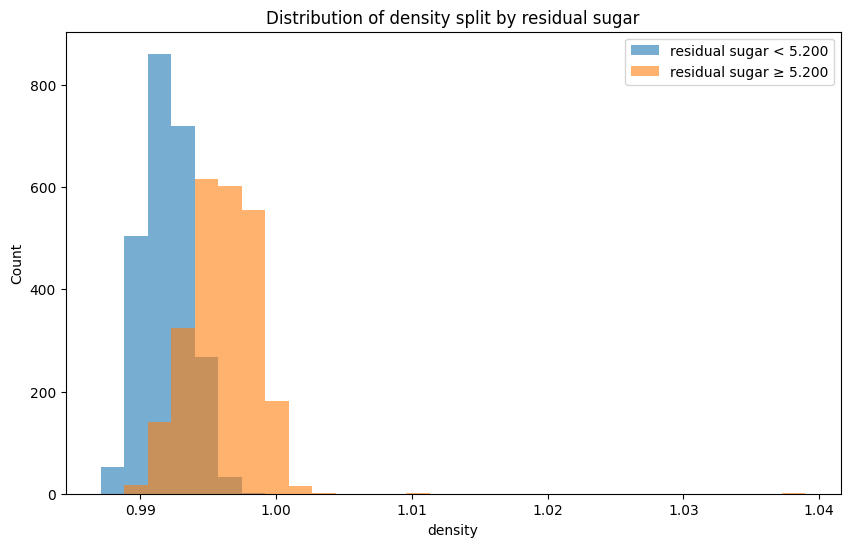

In [9]:
# YOUR CODE HERE

#Putting a numeric column filter in...I know the values are all numeric, however, in exploritory data analysis I want to make this a habit
numeric = df.select_dtypes(include=[np.number])
input_cols = [c for c in numeric.columns if c != "target"] #remove the target feature from the input columns

#Correlation matrix to find dependent input column pairs
corr = numeric[input_cols].corr().abs()

#Find the input pairs that have the strongest dependancy
pair = (
    corr.where(~np.eye(len(corr), dtype=bool))
        .stack()
        .sort_values(ascending=False)
        .index[0]
)
xcol, ycol = pair
print("Selected pair:", xcol, ycol)

#I chose a threshold T as median...I am trying to determine where the input columns is small or large and determine if Y behaves differently when X is large or small
t = df[xcol].median()
print(f"Threshold t = {t:.3f}")

#Split the data on T(median)
left = df[df[xcol] < t][ycol]
right = df[df[xcol] >= t][ycol]

# Axis limits for consistent histogram scaling
xmin = min(left.min(), right.min())
xmax = max(left.max(), right.max())

# Plot
plt.figure(figsize=(10,6))
plt.hist(left, bins=30, range=(xmin, xmax), alpha=0.6, label=f"{xcol} < {t:.3f}")
plt.hist(right, bins=30, range=(xmin, xmax), alpha=0.6, label=f"{xcol} ≥ {t:.3f}")
plt.xlabel(ycol)
plt.ylabel("Count")
plt.title(f"Distribution of {ycol} split by {xcol}")
plt.legend()
plt.show()

#residual sugar and density showed the strongest correlation among input columns in the correlation matrix. Plotting density split by residual sugar above and below the median. You can see where residual sugare is less than the median that the density is low, and vice versa.


YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Number of original input features: 11
Using first 5 principal components.

Explained variance by first 5 PCs: 0.7283
That is 72.83% of the total variation.

PC1: 0.2929
PC2: 0.1432
PC3: 0.1111
PC4: 0.0926
PC5: 0.0885
PC6: 0.0853
PC7: 0.0661
PC8: 0.0545
PC9: 0.0376
PC10: 0.0263
PC11: 0.0019

MSE using first 5 principal components: 0.6448
MSE using all original input features: 0.5632
→ PCA-based model has HIGHER or similar MSE than the full model.


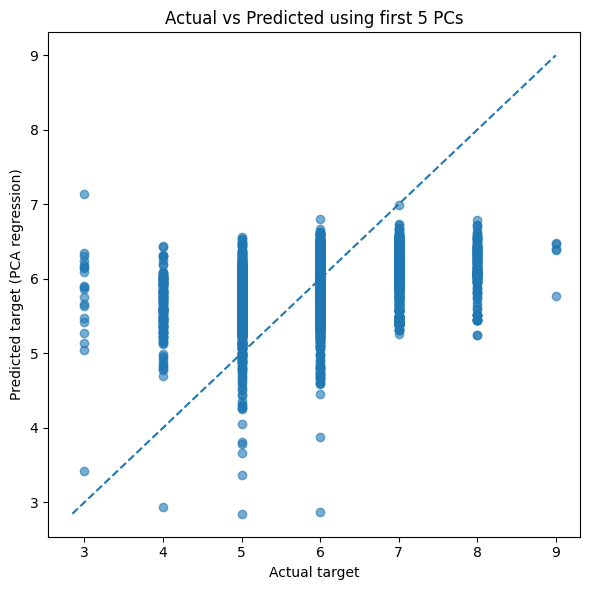

In [13]:
# YOUR CODE HERE

input_cols = df.columns.drop("target")
X = df[input_cols].to_numpy()
y = df["target"].to_numpy()

n_features = X.shape[1]
half_components = n_features // 2  # "first half" of PCs

print(f"Number of original input features: {n_features}")
print(f"Using first {half_components} principal components.\n")

# -----------------------------
# 2. Standardize features manually (z-score)
# -----------------------------
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=0)

# Avoid division by zero for constant columns
X_std_safe = np.where(X_std == 0, 1, X_std)
X_scaled = (X - X_mean) / X_std_safe

# -----------------------------
# 3. PCA on standardized inputs
# -----------------------------
pca = PCA(n_components=n_features)
X_pca_full = pca.fit_transform(X_scaled)

explained_variance_ratios = pca.explained_variance_ratio_

# Variation explained by first half of PCs
var_first_half = explained_variance_ratios[:half_components].sum()
print(f"Explained variance by first {half_components} PCs: {var_first_half:.4f}")
print(f"That is {var_first_half * 100:.2f}% of the total variation.\n")

# Optional: see breakdown per component
for i, ratio in enumerate(explained_variance_ratios, start=1):
    print(f"PC{i}: {ratio:.4f}")
print()

# -----------------------------
# 4. Linear regression on first half of PCs
# -----------------------------
X_pca_reduced = X_pca_full[:, :half_components]

pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(X_pca_reduced, y)

y_pred_pca = pca_model.predict(X_pca_reduced)

# Manual MSE
mse_pca = np.mean((y - y_pred_pca) ** 2)
print(f"MSE using first {half_components} principal components: {mse_pca:.4f}")

# -----------------------------
# 5. Compare to previous full-feature model
#    (rebuild here using same allowed libs)
# -----------------------------
full_model = sklearn.linear_model.LinearRegression()
full_model.fit(X, y)
y_pred_full = full_model.predict(X)
mse_full = np.mean((y - y_pred_full) ** 2)

print(f"MSE using all original input features: {mse_full:.4f}")

if mse_pca < mse_full:
    print("→ PCA-based model has LOWER MSE than the full model.")
else:
    print("→ PCA-based model has HIGHER or similar MSE than the full model.")

# -----------------------------
# 6. Plot: actual targets vs predictions (PCA model)
# -----------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_pca, alpha=0.6)
min_val = min(y.min(), y_pred_pca.min())
max_val = max(y.max(), y_pred_pca.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")  # 45° line
plt.xlabel("Actual target")
plt.ylabel("Predicted target (PCA regression)")
plt.title(f"Actual vs Predicted using first {half_components} PCs")
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [11]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [12]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE